# Coronavirus Data Analysis
*by: Carolina Migliorelli*

This notebook analyse coronavirus data from different sources and plot some global data and some data from Spain.

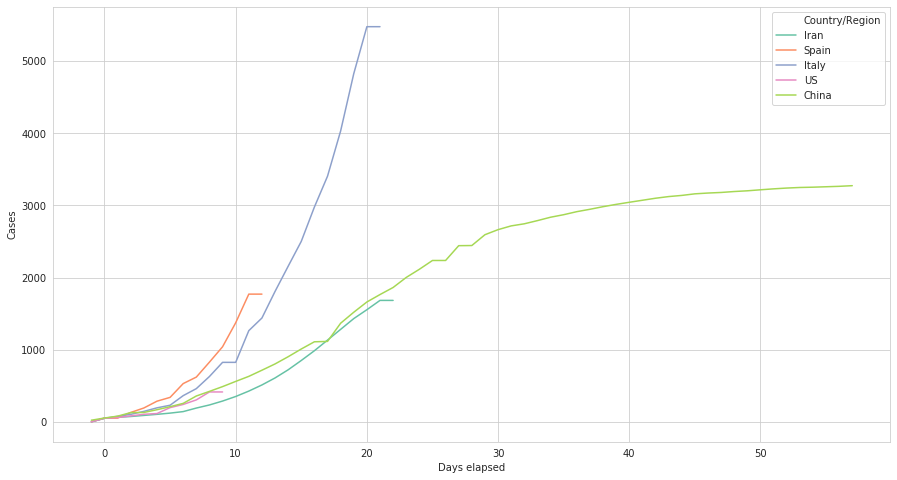

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
## Read Data for Cases, Deaths and Recoveries
ConfirmedCases_raw=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
Deaths_raw=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')
Recoveries_raw=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv')


### Melt the dateframe into the right shape and set index
def cleandata(df_raw):
    df_cleaned=df_raw.melt(id_vars=['Province/State','Country/Region','Lat','Long'],value_name='Cases',var_name='Date')
    return df_cleaned 

def processdata(df_cleaned):
    df_cleaned['Year'] = pd.DatetimeIndex(df_cleaned['Date']).year
    df_cleaned['Month'] = pd.DatetimeIndex(df_cleaned['Date']).month
    df_cleaned['Day'] = pd.DatetimeIndex(df_cleaned['Date']).day
    df_cleaned = df_cleaned.groupby(['Country/Region','Date','Year','Month','Day']).sum().reset_index()
    df_proc=df_cleaned.sort_values(by=['Cases'])
    return df_proc



# Clean all datasets
ConfirmedCases=cleandata(ConfirmedCases_raw)
Deaths=cleandata(Deaths_raw)
Recoveries=cleandata(Recoveries_raw)

# Select countries to plot
countries = ['Spain','Italy','Iran','US','China']

Deaths_aux = Deaths[Deaths['Country/Region'].isin(countries)]
Deaths_aux = processdata(Deaths_aux)

# Define day when the Xth death happened as the day "0"
Deaths_aux['Days elapsed'] = -1
day0 = 50
for country in countries:
    days_elapsed = (len(Deaths_aux[(Deaths_aux['Cases']>day0) & (Deaths_aux['Country/Region']==country)]))
    Deaths_aux['Days elapsed'][(Deaths_aux['Cases']>day0) & (Deaths_aux['Country/Region']==country)]=np.arange(0,days_elapsed)

sns.set_style("whitegrid")
fig_size = (15,8)
fig, ax = plt.subplots(figsize=fig_size)
ax=sns.lineplot(x="Days elapsed", y="Cases",
             hue="Country/Region",
             data=Deaths_aux, palette='Set2',style="Country/Region", markers=True)

In [52]:
spain_cases=pd.read_csv('https://raw.githubusercontent.com/AlbertoCasasOrtiz/Coronavirus-Spain-Dataset/master/cases.csv')

spain_cases = spain_cases.melt(id_vars='Comunidad autónoma',value_name='Cases',var_name='Date')
spain_cases = spain_cases.rename(columns={'Comunidad autónoma':'Country/Region'}) 
date = spain_cases['Date'].str.split('-', n = 2, expand = True) 
spain_cases['Year'] = date[0]
spain_cases['Month'] = date[1]
spain_cases['Day'] = date[2]
spain_cases = spain_cases.sort_values(by=['Cases'])
#spain_cases = spain_cases.drop(columns=['Date'])

Text(0.5, 1.0, 'Casos por comunidades. Dia 0:50')

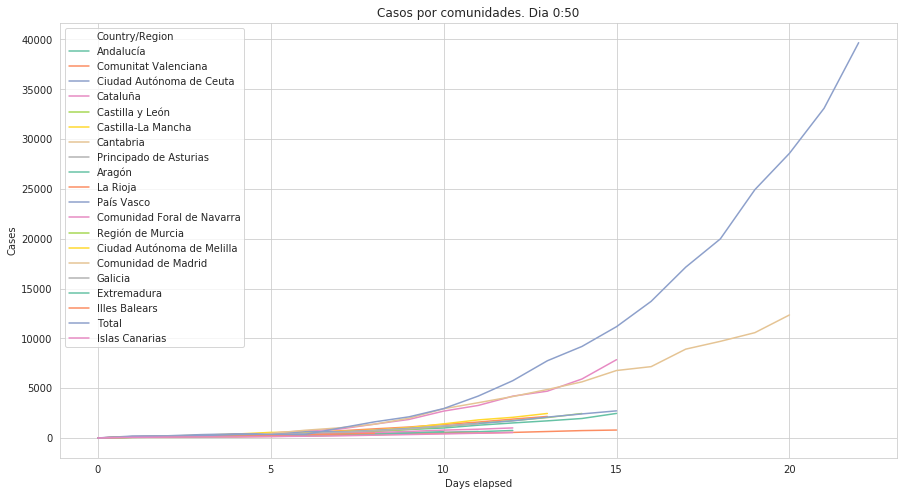

In [47]:
day0 = 50
autonomies = spain_cases['Country/Region'].unique()
spain_cases['Days elapsed'] = 0
for autonomy in autonomies:
    days_elapsed = (len(spain_cases[(spain_cases['Cases']>day0) & (spain_cases['Country/Region']==autonomy)]))
    spain_cases['Days elapsed'][(spain_cases['Cases']>day0) & (spain_cases['Country/Region']==autonomy)]=np.arange(0,days_elapsed)



sns.set_style("whitegrid")
fig_size = (15,8)
fig, ax = plt.subplots(figsize=fig_size)
ax=sns.lineplot(x="Days elapsed", y="Cases",
             hue="Country/Region",
             data=spain_cases, palette='Set2', markers=True)
ax.set_title('Casos por comunidades. Dia 0:' + str(day0))

Text(0.5, 1.0, 'Casos por comunidades más afectadas. Dia 0:50')

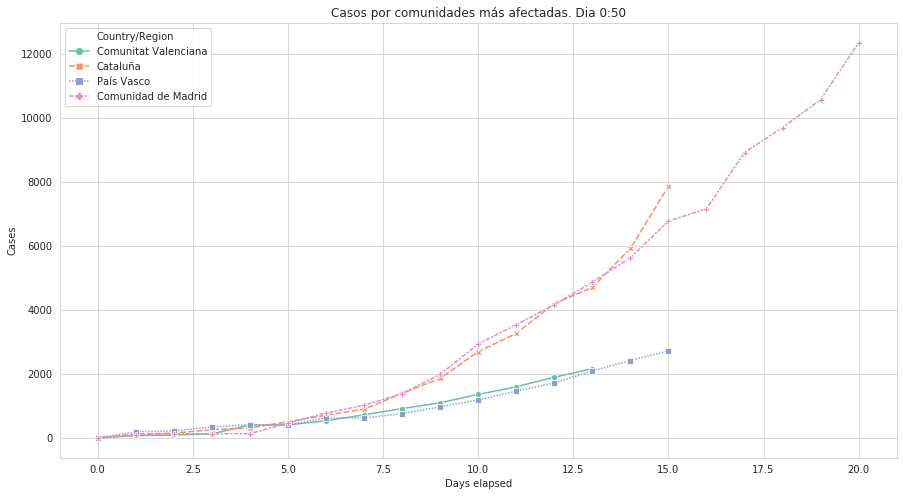

In [54]:
day0 = 50
autonomies = ['Comunidad de Madrid','Cataluña','País Vasco','Comunitat Valenciana']
spain_cases_aux = spain_cases[spain_cases['Country/Region'].isin(autonomies)]
spain_cases_aux['Days elapsed'] = 0
for autonomy in autonomies:
    days_elapsed = (len(spain_cases_aux[(spain_cases_aux['Cases']>day0) & (spain_cases_aux['Country/Region']==autonomy)]))
    spain_cases_aux['Days elapsed'][(spain_cases_aux['Cases']>day0) & (spain_cases_aux['Country/Region']==autonomy)]=np.arange(0,days_elapsed)



sns.set_style("whitegrid")
fig_size = (15,8)
fig, ax = plt.subplots(figsize=fig_size)
ax=sns.lineplot(x="Days elapsed", y="Cases",
             hue="Country/Region",
             data=spain_cases_aux, palette='Set2', markers=True, style = 'Country/Region')
ax.set_title('Casos por comunidades más afectadas. Dia 0:' + str(day0))